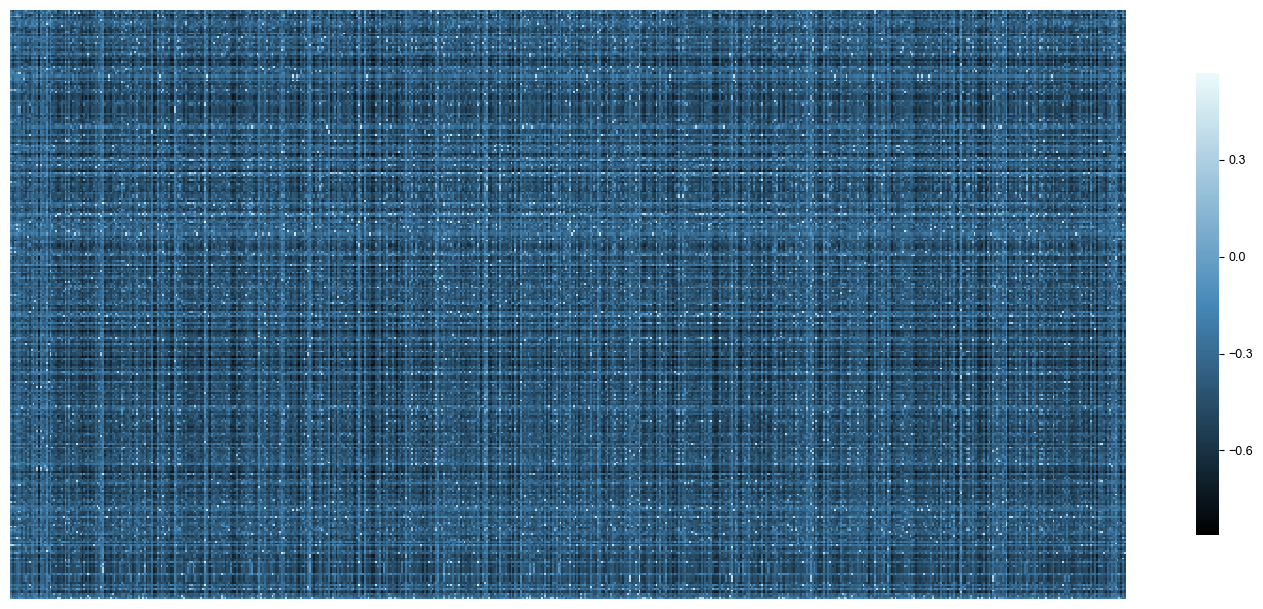

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from sklearn.metrics.pairwise import cosine_similarity as cosine_sim

def load_embeddings(file_path: str, split_index: int):
    """
    Load embeddings from a NumPy file and split them into two groups.

    Args:
        file_path (str): Path to the NumPy file.
        split_index (int): Index to split the embeddings.

    Returns:
        tuple: (first group of embeddings, second group of embeddings)
    """
    embeddings = np.load(file_path)
    return embeddings[:split_index], embeddings[split_index:]


def compute_cosine_similarity(d_emb: np.ndarray, r_emb: np.ndarray) -> np.ndarray:
    """
    Compute cosine similarity between two sets of embeddings.

    Args:
        d_emb (np.ndarray): First set of embeddings.
        r_emb (np.ndarray): Second set of embeddings.

    Returns:
        np.ndarray: Cosine similarity matrix.
    """
    return cosine_sim(d_emb, r_emb)


def plot_heatmap(similarity_matrix: np.ndarray, figsize: tuple = (18, 12)):
    """
    Plot a heatmap of the cosine similarity matrix.

    Args:
        similarity_matrix (np.ndarray): Cosine similarity matrix.
        figsize (tuple, optional): Figure size. Defaults to (6, 4).
    """
    # Set global font to Arial
    plt.rcParams["font.family"] = "Arial"

    # Create custom colormap (black → blue → light blue)
    custom_cmap = mcolors.LinearSegmentedColormap.from_list(
        "custom", ["#000000", "#4688B8", "#ECFAFB"]
    )

    # Create figure
    plt.figure(figsize=figsize)
    ax = sns.heatmap(
        similarity_matrix,
        cmap=custom_cmap,  # Custom color map
        annot=False,       # No text annotation
        linewidths=0,      # No grid lines
        cbar=True,         # Show color bar
        square=True,       # Keep cells square
        cbar_kws={"shrink": 0.5, "ticks": np.arange(-0.6, 0.6, 0.3)}
    )

    # Adjust color bar
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=9)  # Set font size of color bar labels

    # Remove axis labels and ticks
    plt.xticks([])
    plt.yticks([])

    # Show plot
    plt.show()


if __name__ == "__main__":
    # Load and split embeddings
    d_emb, r_emb = load_embeddings("./data/S8/Fdataset_final.npy", split_index=313)

    # Compute cosine similarity
    similarity_matrix = compute_cosine_similarity(d_emb, r_emb)

    # Plot heatmap
    plot_heatmap(similarity_matrix)